In [46]:
import re

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gensim
from gensim.models import Word2Vec

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from src.dataset import read_dataset, tokenize_dataset, get_vocab_mapping

sns.set_theme()
sns.set(rc={'figure.figsize': (12, 8)})

In [47]:
# replace path with local dataset path
dataset_path = "snippets-dev/snippets-dev.db"

In [48]:
def train_test_tokenized_dataset(db_file_path, programming_language=None):
    df = read_dataset(db_file_path, programming_language)
    df = tokenize_dataset(df)
    return train_test_split(df, test_size=0.2)

In [49]:
python_train, python_test = train_test_tokenized_dataset(dataset_path, "Python")

In [50]:
model = Word2Vec(sentences=python_train["code"],
    vector_size=32, window=10, min_count=5, workers=12, sg=1)

In [51]:
np.random.seed(42)
python_train["code"].sample(5)

144       [name, STRING_LITERAL, ,, \n, shape, parameter...
31603     [email_md, NUMBER, =, hashlib, ., md, NUMBER, ...
12992     [STRING_LITERAL, :, self, ., _divisible_by, \n...
50920     [), ,, \n, dict, (, \n, module_name, STRING_LI...
139150    [app, ., add_api, (, STRING_LITERAL, ,, argume...
Name: code, dtype: object

In [52]:
test_words = []
np.random.seed(42)
for code in python_train["code"].sample(5):
    test_words.extend(code)
test_words[:5]

['name', 'STRING_LITERAL', ',', '\n', 'shape']

In [53]:
def word_cloud(words):
    words = list(set(words))
    words = [word for word in words if word in model.wv]
    vecs = [model.wv[word] for word in words]
    vecs = np.asarray(vecs)
    # visulize 2D with dimensionality reductino
    pca = PCA(2)
    vecs = pca.fit_transform(vecs)
    ax = sns.scatterplot(x=vecs[:,0], y=vecs[:,1])
    for i, word in enumerate(words):
        ax.text(vecs[i,0] + 0.01, vecs[i,1], word,
            verticalalignment='center')
    return ax

<AxesSubplot: >

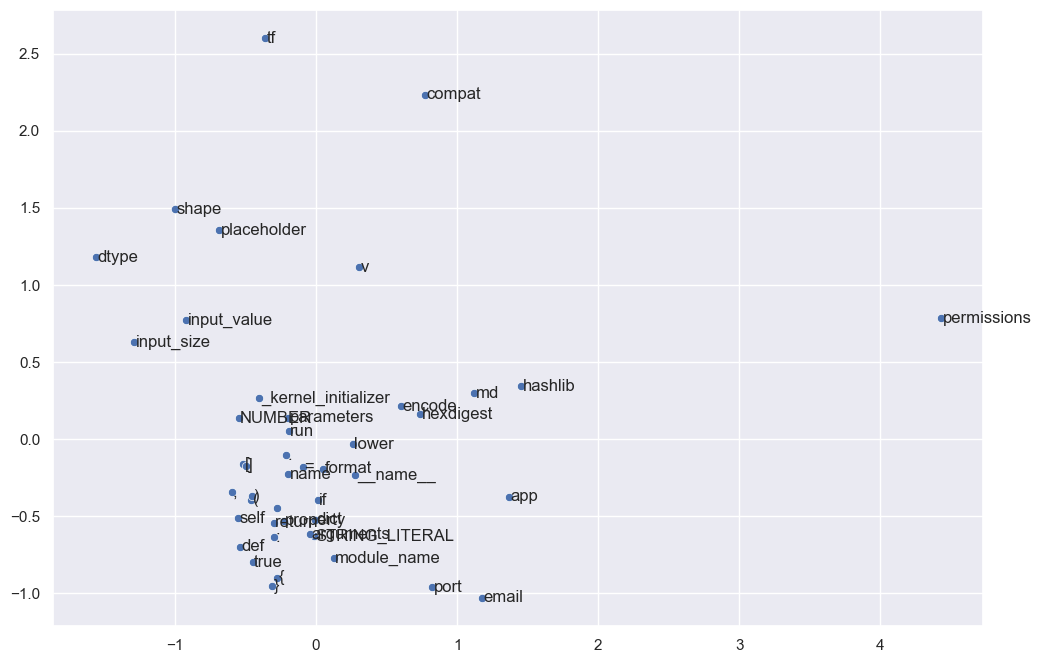

In [54]:
word_cloud(test_words)

<AxesSubplot: >

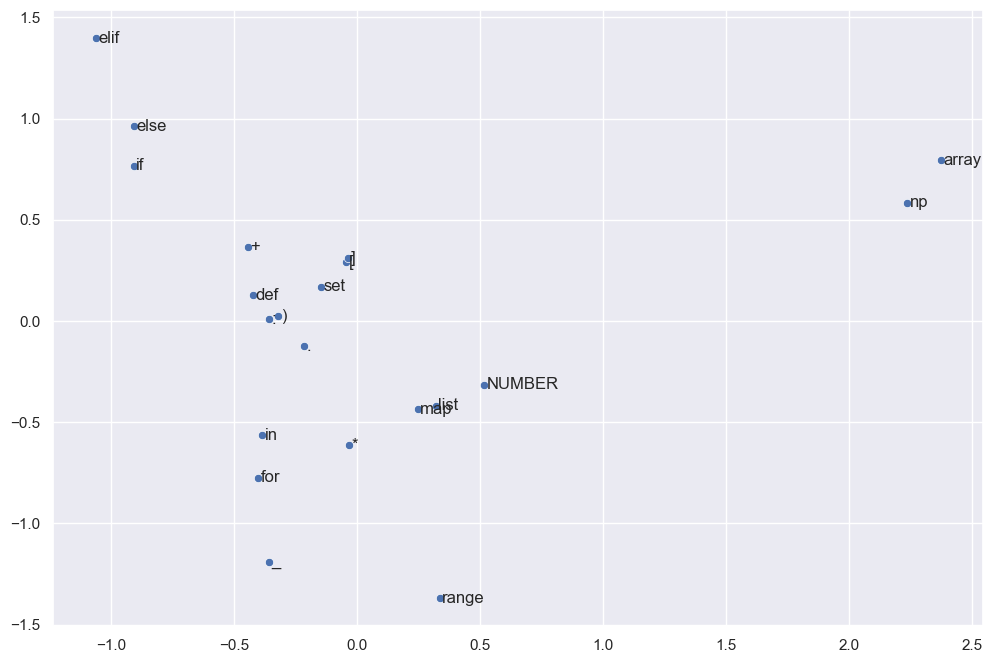

In [55]:
word_cloud(["range", "np", "array", "list", "map", "set", "for", "def", "if", "elif", "else", "in", "NUMBER", "+", "*", "_", ":", "class"
    "(", ")", "[", "]", "."])

In [56]:
model.predict_output_word(["assert"])

[('assert', 0.005093115),
 ('ha_state', 0.0034958946),
 ('mock_calls', 0.0033371206),
 ('result_type_form', 0.0032452943),
 ('data_entry_flow', 0.0026269855),
 ('result_type_abort', 0.002494868),
 ('call_count', 0.0024126626),
 ('is_valid', 0.002323901),
 ('status_code', 0.0023029328),
 ('async_block_till_done', 0.0020190526)]